# UPC Quantum Engineering Final Project: Quantum Channel Discrimination

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from numpy import pi
import numpy as np

## II. One-shot discrimination

### A. Optimal Input

### Setting the options to be parametrized

In [31]:
# Create 2 qbits circuit and 1 output classical bit
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
creg_c = ClassicalRegister(1, 'c')

# angles shift from first parameter, to the second one, with jumps using the third parameter
angles = np.arange(0, pi/2, pi/2/10)

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

### Run all circuit instances

In [35]:
totalResults=[]
totalCounts=[]
totalCircuits=[]

print("Starting the execution")
for theta in angles:
    print("Starting to compute the angle: ", theta)
    # Create the circuit gates
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.reset(qreg_q[1])
    circuit.cry(theta, qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.measure(qreg_q[0], creg_c[0])
    totalCircuits.append(circuit)
    job_sim = execute(circuit, backend_sim, shots=5000)
    results_sim = job_sim.result()
    totalResults.append(results_sim)
    counts = results_sim.get_counts(circuit)
    print(counts)
    totalCounts.append(counts)

Starting the execution
Starting to compute the angle:  0.0
{'0': 5000}
Starting to compute the angle:  0.15707963267948966
{'0': 5000}
Starting to compute the angle:  0.3141592653589793
{'0': 5000}
Starting to compute the angle:  0.47123889803846897
{'0': 5000}
Starting to compute the angle:  0.6283185307179586
{'0': 5000}
Starting to compute the angle:  0.7853981633974483
{'0': 5000}
Starting to compute the angle:  0.9424777960769379
{'0': 5000}
Starting to compute the angle:  1.0995574287564276
{'0': 5000}
Starting to compute the angle:  1.2566370614359172
{'0': 5000}
Starting to compute the angle:  1.413716694115407
{'0': 5000}


printing the first circuit


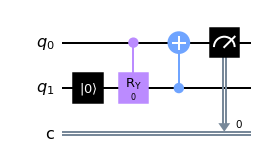

In [39]:
print("printing the first circuit")
totalCircuits[0].draw('mpl')